reference: https://github.com/melanieshi0120/Simple_Linear_Regression_python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df['age_of_building'] = [2015-df.yr_built[i] for i in range(len(df))]

In [5]:
inputs = df.sqft_living

In [6]:
target = df.price

In [7]:
inputs.isnull().sum()

0

In [8]:
target.isnull().sum()

0

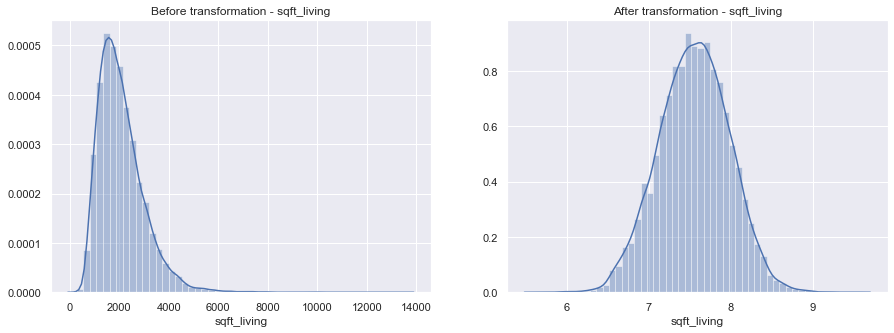

In [9]:
# independent variable - sqft_living
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(inputs)
plt.title('Before transformation - sqft_living')

plt.subplot(1,2,2)
sns.distplot(np.log(inputs))
plt.title('After transformation - sqft_living')
plt.show()

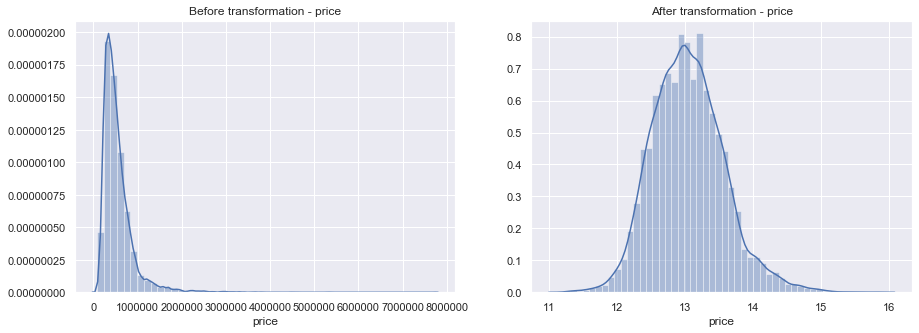

In [10]:
# dependent variable - price
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(target)
plt.title('Before transformation - price')

plt.subplot(1,2,2)
sns.distplot(np.log(target))
plt.title('After transformation - price')
plt.show()

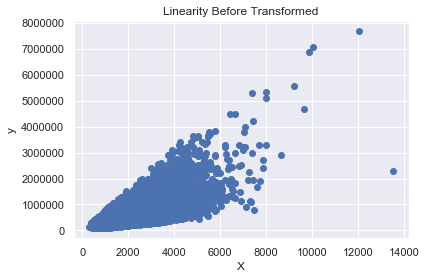

In [11]:
# Linearity before transformed
plt.scatter(inputs, target)
plt.title('Linearity Before Transformed')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

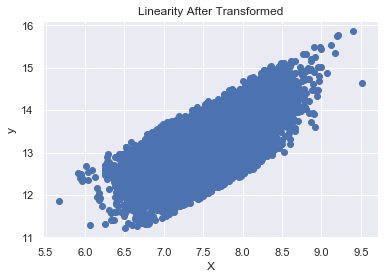

In [12]:
# Linearity after transformed
plt.scatter(np.log(inputs), np.log(target))
plt.title('Linearity After Transformed')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

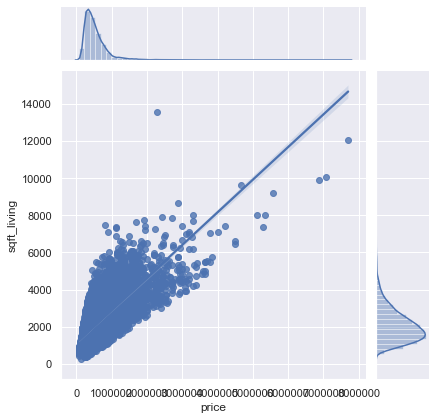

In [13]:
# using seaborn - before transformation
sns.jointplot('price', 'sqft_living', data=df, kind='reg')

<Figure size 1080x576 with 0 Axes>

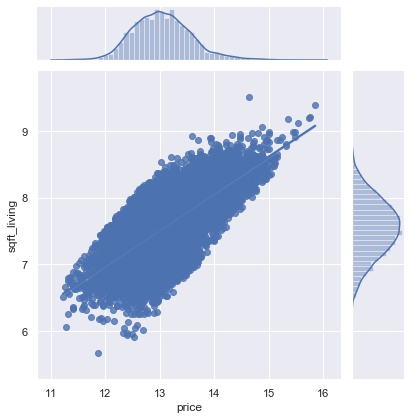

In [14]:
# using seaborn - after transformation
plt.figure(figsize=(15,8))
sns.jointplot(np.log(df.price), np.log(df.sqft_living), kind='reg')

In [15]:
# declare x and y
x = np.log(inputs)
y = np.log(target)

### Linear Regression

In [19]:
# Sklean
# In order to feed x to sklean, it should be a 2D array (a matrix)
X = x.values.reshape(-1, 1)

In [21]:
# import package
from sklearn.linear_model import LinearRegression

In [22]:
# fit the model
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [23]:
# r_squared
reg.score(X,y)

0.45550706431577015

In [26]:
# cofficient
reg.coef_

array([0.83677095])

In [27]:
# since we transformed data then let us transform it back
# prediction
y_hat = reg.predict(X)

In [ ]:
# plot predicted values and actual values
plt.plot(x,y_hat, label = 'Predicted Values', color = 'r')
plt.scatter(x, y, label = 'Actual Values', color='blue')
plt.title('Predicted values VS Actual values', fontsize=15)
plt.xlabel('log_sqft_living')
plt.ylabel('log_Price')
plt.legend()
plt.show()